In [40]:
import pandas as pd

college = pd.read_csv('Dataset/College.csv', index_col=0).dropna()
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [41]:
# Convert 'Private' column to dummy variables
college['Private'] = pd.get_dummies(college['Private']).iloc[:,0]

In [42]:
college.isna().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

In [43]:
# Split the data into features and target variable
X = college.drop(['Apps'], axis=1)
y = college['Apps']

In [44]:
from sklearn.model_selection import train_test_split

X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(fit_intercept=True)

lr.fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))

1022430.0889255108

In [46]:
lr.score(X_test,y_test)

0.9002392990734553

Text(0.5, 1.0, 'Residual Plot')

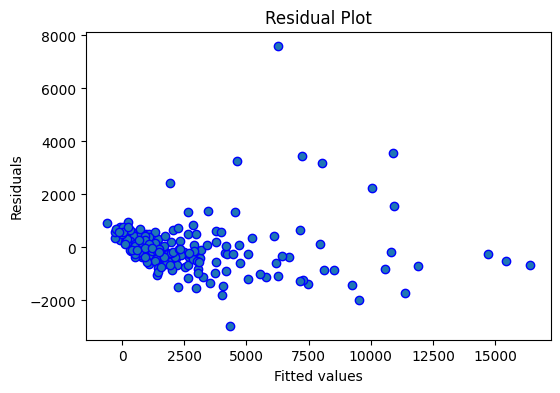

In [47]:
import matplotlib.pyplot as plt

fitted_values = lr.predict(X_test)
residuals = y_test - fitted_values

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(fitted_values, residuals, edgecolors='b');
ax.set_xlabel('Fitted values');
ax.set_ylabel('Residuals');
ax.set_title('Residual Plot')

From the plot above, it is evident that the residual plot has a pattern, which may indicate that the relationship between the response and the predictors is nonlinear.

In [48]:
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

rcv = RidgeCV(alphas=np.linspace(.01, 100, 1000),  cv=10)
rcv.fit(X_train_scaled, y_train) 

RidgeCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.21108108e+00, 1.31117117e+00, 1.41126126e+00, 1.51135135e+00,
       1.61144144e+00, 1.71153153e+00, 1.81162162e+00, 1.91171171e+00,
       2.01180180e+00, 2.11189189e+0...
       9.76979279e+01, 9.77980180e+01, 9.78981081e+01, 9.79981982e+01,
       9.80982883e+01, 9.81983784e+01, 9.82984685e+01, 9.83985586e+01,
       9.84986486e+01, 9.85987387e+01, 9.86988288e+01, 9.87989189e+01,
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
        cv=10)

In [49]:
rcv.alpha_

5.615045045045044

In [51]:
rcv.score(X_test_scaled,y_test)

0.9033600519528133

In [52]:
np.mean((rcv.predict(scaler.transform(X_test)) - y_test) ** 2)

990446.0349411083